# PREDICTION USING SUPERVISED MACHINE LEARNING


In [2]:
from IPython.display import Image
img = 'SupervisedML.jpg'
Image(url=img , width = 700 , height = 700)

**AUTHOR : KOMAL JANGRA**

 PROBLEM STATEMENT

In [3]:
# We are given study hours and scores of 25 students in the Dataset .
# Predict the percentage of a student based on the no. of study hours.
# What will be predicted score if a student studies for 9.25 hrs/ day?

In [4]:
# importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

LOADING THE DATASET

In [5]:
df = pd.read_csv('Supervised_data.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


**GETTING INSIGHTS OF THE DATASET**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**This tells there are 25 records where Study hours and Scores are given**

In [7]:
df.nunique

<bound method DataFrame.nunique of     Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86>

In [8]:
df.isnull().sum()

Hours     0
Scores    0
dtype: int64

**There isnt any Null Value in the Data set**

In [9]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


**This shows aggregate functions of the Data set.**

In [10]:
df.shape

(25, 2)

**There are 25 rows and 2 Columns**

# PLOTTING THE DATASET

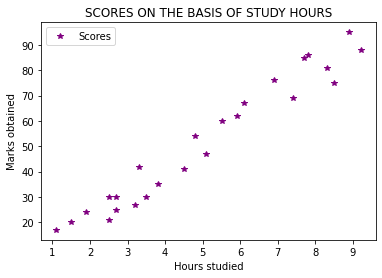

In [11]:
df.plot(x = 'Hours', y = 'Scores', style = '*' , c = 'purple')
plt.title( 'SCORES ON THE BASIS OF STUDY HOURS')
plt.xlabel('Hours studied')
plt.ylabel('Marks obtained')
plt.show()

**This shows there is a Positive Correlation between Study Hours and Scores.**

In [12]:
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


**Hence it is proved that if a student studies for more time he will score good marks.**

# CLEANING THE DATA

Since we found out earlier that there is not any Null values in the Data .We can proceed with training the model.

**TRAINING AND TESTING THE DATA**

In [13]:
x = (df['Hours'].values).reshape(-1,1)
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
y = df['Scores'].values
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

**SPLITTING THE DATA**

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x ,y ,test_size = 0.2,random_state = 0)
print ('Splitting is Done')

Splitting is Done


**TRAINING THE DATA**

In [16]:
from sklearn.linear_model import LinearRegression
regn = LinearRegression()
regn.fit(x_train,y_train)
print('Training is Done')

Training is Done


In [17]:
# Finding out INTERCEPT value and LINEAR Coefficient

print('Intercept value is:', regn.intercept_)
print('Linear cofficient is :' , regn.coef_)

Intercept value is: 2.018160041434683
Linear cofficient is : [9.91065648]


In [18]:
# Plotting the Regression Line


Regline = regn.coef_*x+regn.intercept_

# PLOTTING FOR TESTING DATA

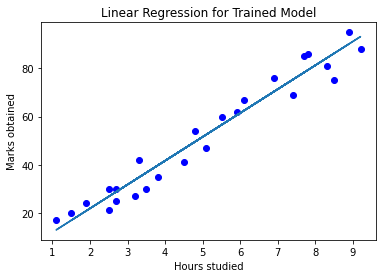

In [19]:
plt.scatter(x,y,c='blue')
plt.title('Linear Regression for Trained Model')
plt.xlabel('Hours studied')
plt.ylabel('Marks obtained')
plt.plot(x,Regline)
plt.show()

**This Scatter Plot depicts there is a Linear Relationship between Hours Studied and Marks Obtained**

PREDICTING VALUES

In [20]:
# To predict scores of testing Data
y_pred = regn.predict(x_test)
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

COMPARING WITH ACTUAL DATASET

In [21]:
df1 = pd.DataFrame({'Actual':y_test , 'Predicted': y_pred})
df1

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


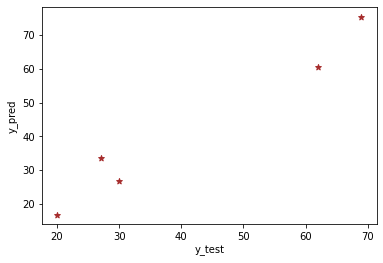

In [22]:
plt.scatter(y_test, y_pred , marker = '*' , c = 'brown')
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

**This Scatter Plot between Prediting the scores and testing shows a Positive Linear Relationship.**

**PROBLEM STATEMENT:What will be predicted score of student if he studies for 9.25 hours/day?**

In [23]:
hours =  9.25
pred_score = regn.predict([[hours]])
print('Number of hours =' ,hours)
print('Predicted Scores =' ,pred_score[0].round())

Number of hours = 9.25
Predicted Scores = 94.0


**Hence using the above Regression Model we can conclude that if a student studies for 9.25 hours per day he would Score 94% marks** 

# EVALUATING THE MODEL

In [24]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test , y_pred))

Mean Absolute Error: 4.183859899002975


# CONCLUSION:

**This above Dataset shows that more the hours student give to his studies more the marks he will score.**